In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
X_dev = pd.read_csv('finalized_data/X_dev.csv')
X_test = pd.read_csv('finalized_data/X_test.csv')
y_dev = pd.read_csv('finalized_data/y_dev.csv')
y_test = pd.read_csv('finalized_data/y_test.csv')

### Model
## XGboost

In [3]:
xgb_no = XGBRegressor(random_state = 10)
xgb_no.fit(X_dev, y_dev)
print('xgboost train score:', xgb_no.score(X_dev, y_dev))
print('xgboost test score:', xgb_no.score(X_test, y_test))

xgboost train score: 0.3876641372988512
xgboost test score: 0.2239949427337221


In [4]:
xgb = RandomizedSearchCV(XGBRegressor(random_state = 40),
 param_distributions = {'gamma': [0,.005,.01,.03,.05,.08,.1],
 'eta' : [0,.005,.01,.03,.05,.08,.1],
 'max_depth' : [3,5,6,7,9,11], 'min_child_weight' : [1,2,3,5,8]},
 cv = 10)

xgb.fit(X_dev, y_dev)
print('xgboost Best score:', xgb.best_score_)
print('xgboost Best alpha:', xgb.best_params_)

xgboost Best score: 0.230789169665311
xgboost Best alpha: {'min_child_weight': 2, 'max_depth': 7, 'gamma': 0.08, 'eta': 0.05}


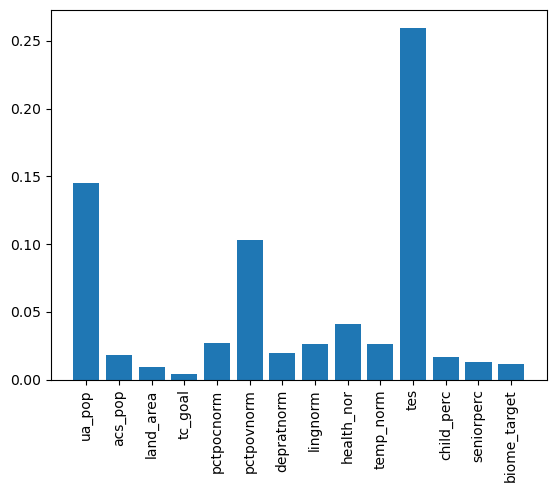

In [5]:
perm_rand = permutation_importance(xgb, X_dev, y_dev)
mean_perm_rand = perm_rand.importances_mean
plt.bar(X_dev.columns, mean_perm_rand)
plt.xticks(rotation=90)
plt.show()

In [6]:
# removing all put top 4
top_feats = ['ua_pop', 'pctpovnorm', 'tes', 'health_nor']
X_dev_top_feats = X_dev[top_feats]
X_test_top_feats = X_test[top_feats]

In [14]:
xgb2 = XGBRegressor(random_state = 44,
                    min_child_weight= 1, max_depth= 7,
                    gamma= 0.005, eta= 0.08)

xgb2.fit(X_dev, y_dev)
print('xgboost train score:', xgb2.score(X_dev, y_dev))
print('xgboost test score:', xgb2.score(X_test, y_test))

pred = xgb2.predict(X_test) 
  
# RMSE Computation 
MSE(y_test, pred)

xgboost train score: 0.33432203344840894
xgboost test score: 0.22932883032983342


0.02269331199979276

In [8]:
xgb3 = XGBRegressor(random_state = 44,
                    min_child_weight= 1, max_depth= 7,
                    gamma= 0.005, eta= 0.08)

xgb3.fit(X_dev_top_feats, y_dev)
print('xgboost train score:', xgb3.score(X_dev_top_feats, y_dev))
print('xgboost test score:', xgb3.score(X_test_top_feats, y_test))

xgboost train score: 0.27227912128147913
xgboost test score: 0.20527637595576986


In [9]:
xgb4 = RandomizedSearchCV(XGBRegressor(random_state = 40),
 param_distributions = {'gamma': [0,.005,.01,.03,.05,.08,.1],
 'eta' : [0,.005,.01,.03,.05,.08,.1],
 'max_depth' : [3,5,6,7,9,11], 'min_child_weight' : [1,2,3,5,8]},
 cv = 10)

xgb4.fit(X_dev_top_feats, y_dev)
print('xgboost Best score:', xgb4.best_score_)
print('xgboost Best alpha:', xgb4.best_params_)

xgboost Best score: 0.210118162789316
xgboost Best alpha: {'min_child_weight': 5, 'max_depth': 6, 'gamma': 0.05, 'eta': 0.08}
